# EDA  Asia Population

In [1]:
#Loading necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium


%matplotlib inline

In [2]:
#Loading dataset
data=pd.read_csv('AsiaPopulation2020.csv')
data.head()

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
2,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56.0,0.13
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11


## Checking nan values

<AxesSubplot:>

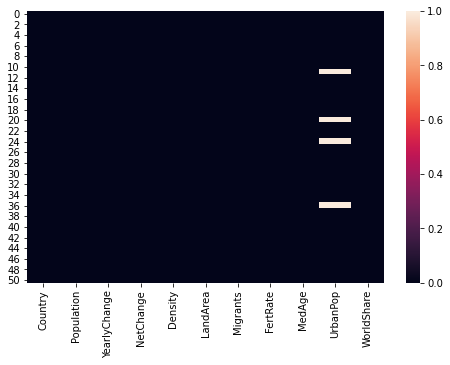

In [3]:
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull())

In [4]:
data[data['UrbanPop'].isnull()]

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
11,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10
20,Kuwait,4270571,1.51,63488,240,17820,39520,2.1,37,NaN,0.05
24,Macao,649335,1.39,8890,21645,30,5000,1.2,39,NaN,0.01
36,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,NaN,0.08


From the above heatmap we see that there are 4 countries that have missing values of Urban Population

### Dealing with NAN values

All missing values have a 100% urbanization index, 
according to https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS

In [5]:
## Filling nan values with 100%
data['UrbanPop'].fillna(100,inplace=True)

In [6]:
data.isnull().sum()

Country         0
Population      0
YearlyChange    0
NetChange       0
Density         0
LandArea        0
Migrants        0
FertRate        0
MedAge          0
UrbanPop        0
WorldShare      0
dtype: int64

All the Nan vaues have been filled.

## Overview

In [7]:
data.columns

Index(['Country', 'Population', 'YearlyChange', 'NetChange', 'Density',
       'LandArea', 'Migrants', 'FertRate', 'MedAge', 'UrbanPop', 'WorldShare'],
      dtype='object')

In [295]:
data.dtypes

Country          object
Population        int64
YearlyChange    float64
NetChange         int64
Density           int64
LandArea          int64
Migrants          int64
FertRate        float64
MedAge            int64
UrbanPop        float64
WorldShare      float64
dtype: object

In [8]:
data.describe()

,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
count,5.100000e+01,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000
mean,9.100107e+07,1.267843,7.781094e+05,997.647059,6.084928e+05,-33904.235294,2.331373,30.862745,61.705882,1.168039
std,2.748929e+08,0.822083,2.111831e+06,3321.752241,1.430488e+06,135241.664715,0.805603,6.785336,24.523698,3.526507
min,4.374790e+05,-0.440000,-3.838400e+05,2.000000,3.000000e+01,-532687.000000,1.100000,18.000000,18.000000,0.010000
25%,5.104020e+06,0.805000,4.749550e+04,73.500000,2.505500e+04,-30006.000000,1.900000,26.000000,38.000000,0.070000
50%,1.671896e+07,1.300000,1.198730e+05,123.000000,1.433500e+05,-4000.000000,2.100000,30.000000,61.000000,0.210000
75%,4.574584e+07,1.710000,5.367205e+05,357.500000,4.904100e+05,23236.000000,2.800000,34.500000,81.000000,0.590000
max,1.439324e+09,3.680000,1.358663e+07,21645.000000,9.388211e+06,283922.000000,4.600000,48.000000,100.000000,18.470000


In [9]:
len(data['Country'])

51

## Exploratory Data Analysis

In [10]:
data.head()

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
2,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56.0,0.13
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11


### Most populated country

[None]

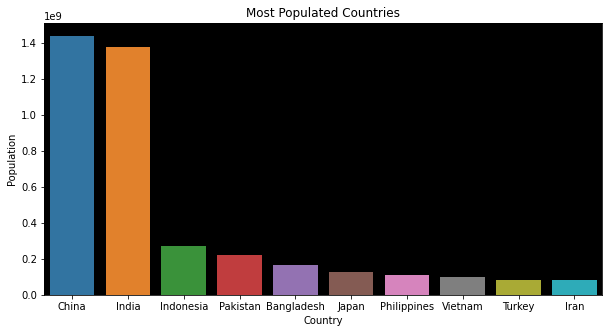

In [299]:
plt.figure(figsize=(10,5))
ax = plt.axes()
sns.barplot(x='Country',y='Population',data=data.nlargest(10, 'Population'))
plt.title('Most Populated Countries')
ax.set(facecolor = 'black')

### Highest land Area Covered by which country

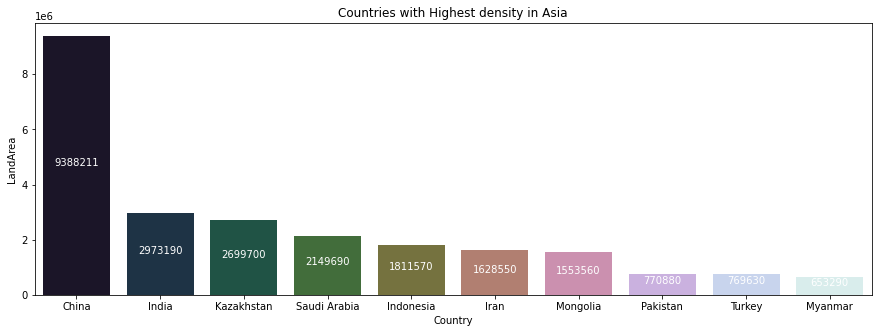

In [104]:
plt.figure(figsize=(15,5))
graph=sns.barplot(x='Country',y='LandArea',data=data.nlargest(10,'LandArea'),palette = 'cubehelix')


for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(round(height)),
            ha="center", color='white')
plt.title("Countries with Highest density in Asia");

We can see from the above graph, that though China has more than triple Land Area than India but nearly same population

We can see the Density, Land Area and Population follow Lognormal Distribution

## Median age in Asia

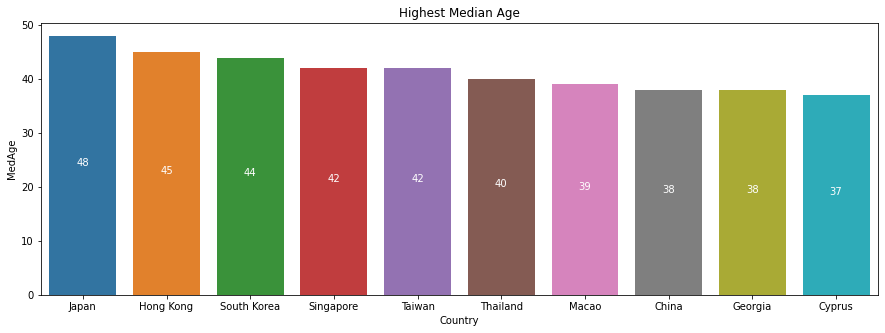

In [301]:
## Highest Median Age
plt.figure(figsize=(15,5))
graph=sns.barplot(x='Country',y='MedAge',data=data.nlargest(10,'MedAge'))

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(round(height)),
            ha="center", color='white')
plt.title("Highest Median Age");


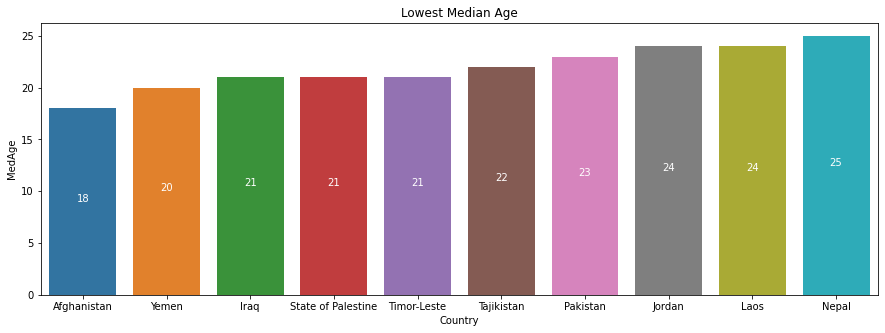

In [302]:
## Lowest Median Age
plt.figure(figsize=(15,5))
graph=sns.barplot(x='Country',y='MedAge',data=data.nsmallest(10,'MedAge'))

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(round(height)),
            ha="center", color='white')
plt.title("Lowest Median Age");


In [303]:
data.head()

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
2,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56.0,0.13
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11


Text(0.5, 1.0, 'Relationship between Median age and Fertility Rate')

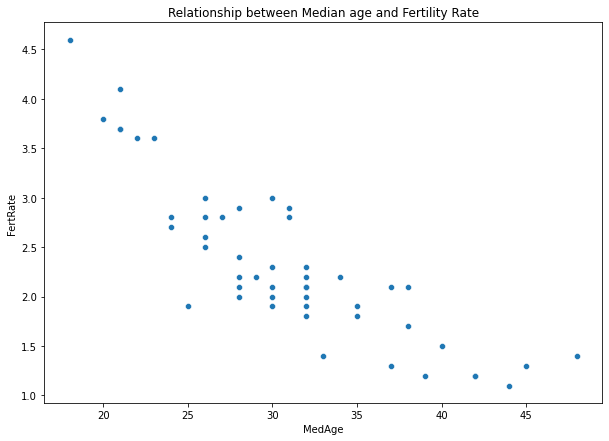

In [304]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='MedAge', y='FertRate', data=data)
plt.title('Relationship between Median age and Fertility Rate')

The older the age, the lower would be the fertility Age.
We can see that fertility rate is dependent on Median age

## Urban Population

Text(0.5, 1.0, 'Urban Population')

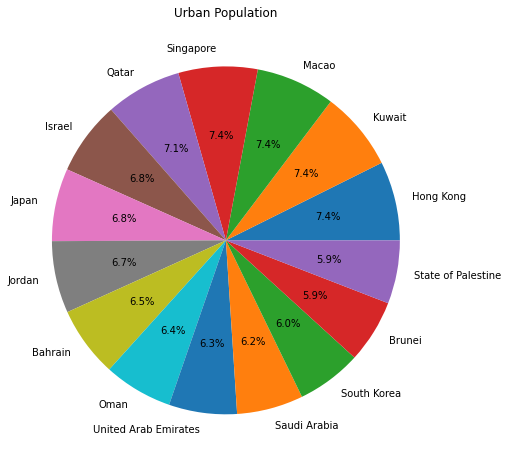

In [305]:
plt.figure(figsize=(8,8))
labels=data.nlargest(15,'UrbanPop')['Country']
sizes=data.nlargest(15,'UrbanPop')['UrbanPop']
plt.pie(sizes,data=data.nlargest(10,'UrbanPop'),labels=labels,autopct='%1.1f%%')
plt.title('Urban Population')

<Figure size 1440x720 with 0 Axes>

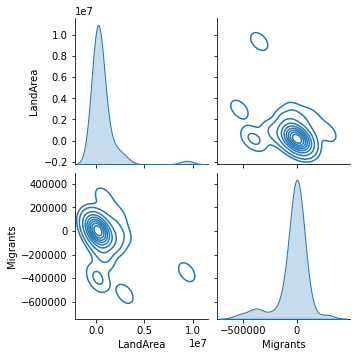

In [318]:
## Finding Relationship between Land Area and Migrants 
plt.figure(figsize=(20,10))
sns.pairplot(data=data[['LandArea','Migrants']],kind='kde')


### Population Analysis

Text(0.5, 1.0, "Asia's population share in the world")

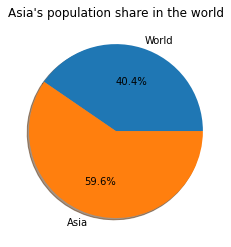

In [354]:
asia_share = data['WorldShare'].sum()
world_share=100-asia_share
plt.pie(x=[world_share,asia_share],labels=['World','Asia'],autopct='%1.1f%%', shadow=True)
plt.title("Asia's population share in the world")


<ipython-input-372-6f4d9be55f48>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


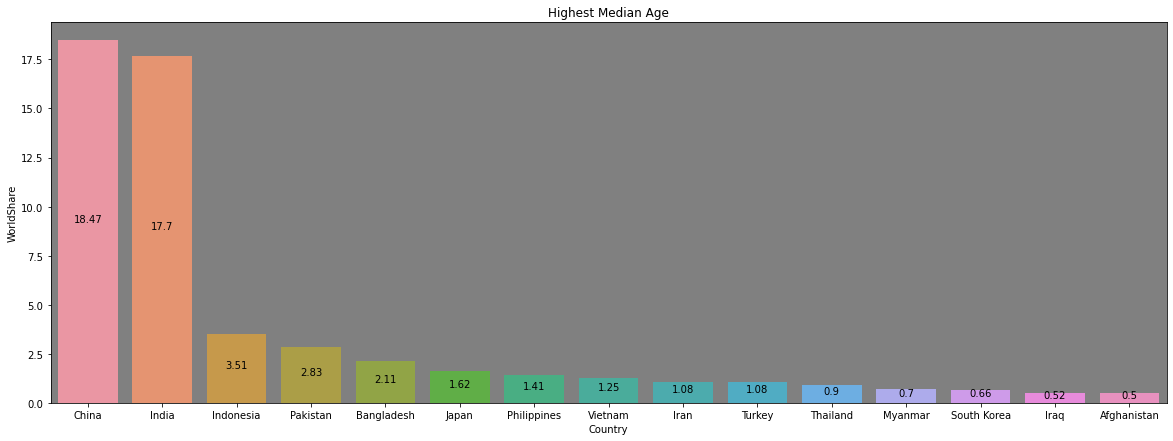

In [372]:
plt.figure(figsize=(20,7))
graph=sns.barplot(x='Country',y='WorldShare',data=data.nlargest(15,'WorldShare'))

ax=plt.axes()
ax.set(facecolor='Gray')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format((height)),
            ha="center", color='black')
plt.title("Highest Median Age");



China and India constitutes around 35% of world population





#### Fastest Growing Populations

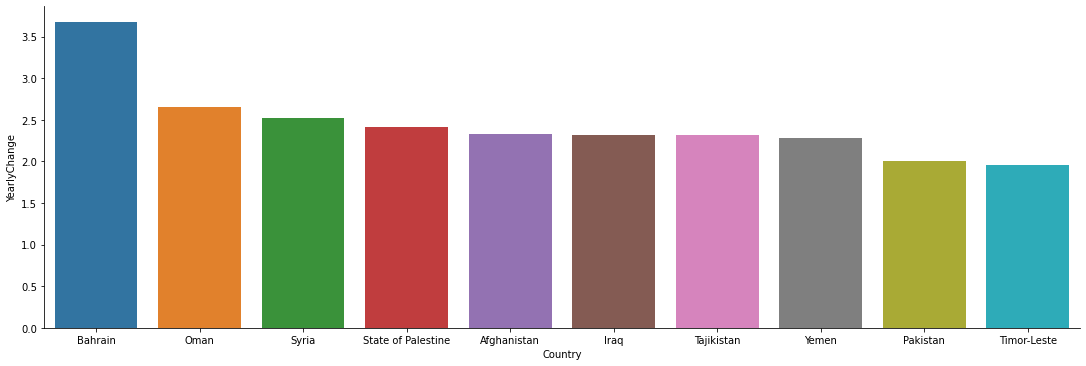

In [392]:

df=data.sort_values(by='YearlyChange',ascending=False).head(10)
sns.catplot(x='Country',y='YearlyChange',data=df,kind='bar',height=5, aspect=27/9)

#### Slowest growing population

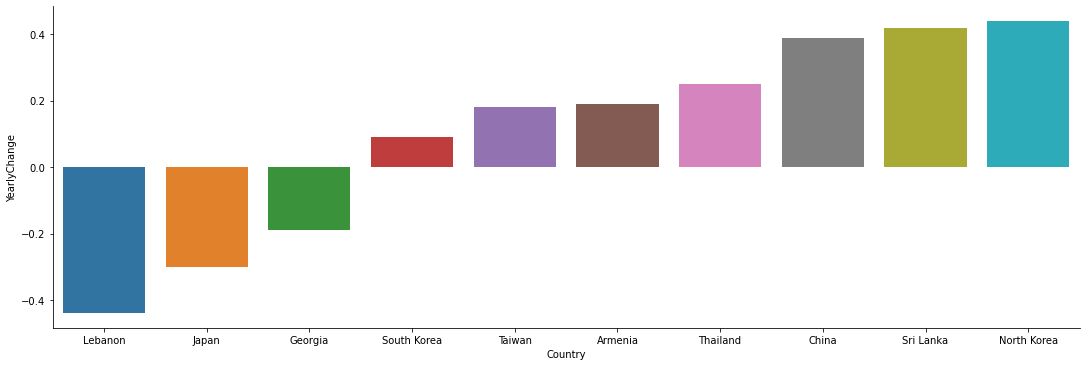

In [399]:
df2=data.sort_values(by='YearlyChange',ascending=True).head(10)
sns.catplot(x='Country',y='YearlyChange',kind='bar',data=df2,height=5, aspect=27/9)


3 countries have negative growing population

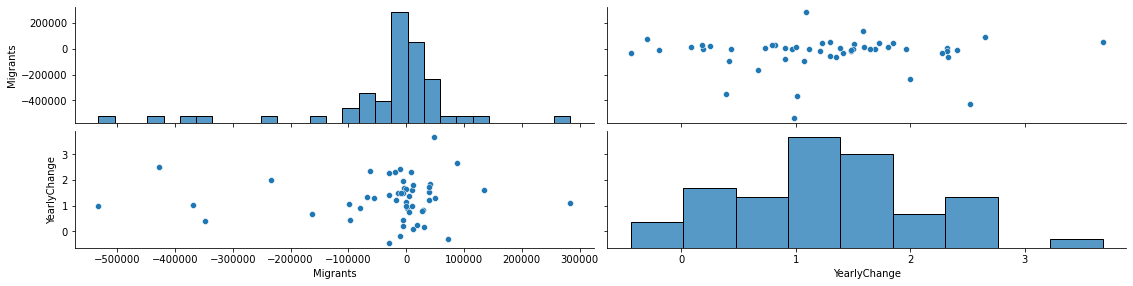

In [103]:
## Relationship between Migrants and Yearly Change
sns.pairplot(data[['Migrants','YearlyChange']],height=2,aspect=4)

### Finding correlation between all the features


<AxesSubplot:>

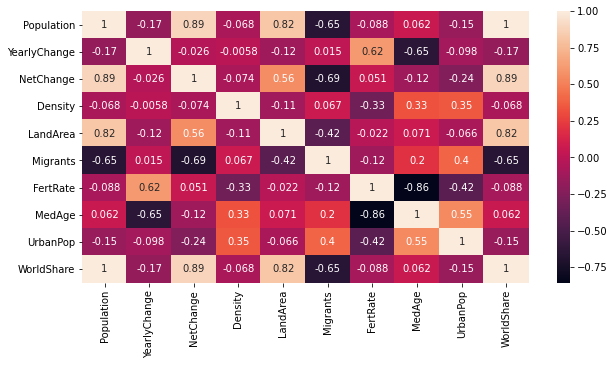

In [112]:
corr=data.corr()
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(corr, annot = True)